Этот набор данных имитирует реальные данные о разработке лекарств для приложений искусственного интеллекта и машинного обучения. Он содержит 2000 соединений с указанием молекулярных свойств, характеристик белков и показателей аффинности связывания. Набор данных разработан для имитации данных фармацевтических исследований и разработок при сохранении конфиденциальности.

Характеристики набора данных
🎯 Целевые переменные:
- binding_affinity (непрерывный)
- active (двоичная классификация)
⚠️ Реальные проблемы:
- 5 % намеренных выбросов
- 3% пропущенных значений
- 
Несбалансированные занятия (35 % активности)
🧪 Научная обоснованность: характеристики соответствуют реальным распределениям молекулярных свойств


Потенциальные области Применения:
- Создавайте модели машинного обучения для прогнозирования аффинности связывания
- Классификация активных и неактивных соединений
- Практика работы с пропущенными данными и выбросами
- Анализ значимости признаков для разработки лекарств
- Разработка виртуального конвейера скрининга

Признаки:
compound_id — идентификатор соединения

protein_id — идентификатор белка

molecular_weight — молекулярная масса

logp — коэффициент распределения (logP)

h_bond_donors — доноры водородных связей

h_bond_acceptors — акцепторы водородных связей

rotatable_bonds — число вращающихся связей

polar_surface_area — полярная поверхность

compound_clogp — вычисленный logP (cLogP)

protein_length — длина белка

protein_pi — изоэлектрическая точка белка

hydrophobicity — гидрофобность белка

binding_site_size — размер связывающего сайта

mw_ratio — отношение молекулярных масс

logp_pi_interaction — взаимодействие logP с pI

binding_affinity — сродство связывания

active — активность (бинарная)



Сначала модель обучиться для регрессии, а потом для бинарной классификации

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Просмотр датасета

In [2]:
file_path = "drug.csv"
df = pd.read_csv(file_path)
df

,compound_id,protein_id,molecular_weight,logp,h_bond_donors,h_bond_acceptors,rotatable_bonds,polar_surface_area,compound_clogp,protein_length,protein_pi,hydrophobicity,binding_site_size,mw_ratio,logp_pi_interaction,binding_affinity,active
0,CID_00000,PID_361,499.671415,2.487233,1,7,4,113.350817,4.050696,678,6.019657,0.812534,12.512165,0.736978,14.972288,5.996665,0
1,CID_00001,PID_165,436.173570,3.283222,3,4,4,71.981132,3.704408,876,6.447408,0.651417,11.538420,0.497915,21.168271,6.445742,0
2,CID_00002,PID_168,514.768854,NaN,2,11,11,83.936307,1.869610,658,3.925837,0.633467,13.155702,0.782323,9.074061,5.689583,0
3,CID_00003,PID_226,602.302986,3.038058,0,5,5,79.868125,2.451909,312,7.597056,0.513038,12.071822,1.930458,23.080293,6.043438,0
4,CID_00004,PID_224,426.584663,0.659578,2,4,5,88.198676,1.771936,1418,4.249454,0.613571,15.850448,0.300835,2.802846,4.845055,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,CID_01995,PID_425,557.015024,3.542686,4,5,11,102.329688,1.470121,240,7.862185,0.770925,21.308909,2.320896,27.853256,7.209850,1
1996,CID_01996,PID_100,447.347874,0.383282,1,8,5,52.321214,3.739447,718,7.401501,0.644721,16.578658,0.623047,2.836864,9.029696,1
1997,CID_01997,PID_265,361.812535,3.019553,0,4,9,86.722469,3.122027,1228,5.551238,0.717044,16.829751,0.294636,16.762259,5.728118,0
1998,CID_01998,PID_125,433.693304,5.965067,0,4,10,86.932238,3.866579,1244,5.680128,0.661245,10.604194,0.348628,33.882348,7.324152,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   compound_id          2000 non-null   object 
 1   protein_id           2000 non-null   object 
 2   molecular_weight     2000 non-null   float64
 3   logp                 1940 non-null   float64
 4   h_bond_donors        2000 non-null   int64  
 5   h_bond_acceptors     2000 non-null   int64  
 6   rotatable_bonds      2000 non-null   int64  
 7   polar_surface_area   1940 non-null   float64
 8   compound_clogp       2000 non-null   float64
 9   protein_length       2000 non-null   int64  
 10  protein_pi           2000 non-null   float64
 11  hydrophobicity       1940 non-null   float64
 12  binding_site_size    2000 non-null   float64
 13  mw_ratio             2000 non-null   float64
 14  logp_pi_interaction  2000 non-null   float64
 15  binding_affinity     2000 non-null   f

In [4]:
df.describe()

,molecular_weight,logp,h_bond_donors,h_bond_acceptors,rotatable_bonds,polar_surface_area,compound_clogp,protein_length,protein_pi,hydrophobicity,binding_site_size,mw_ratio,logp_pi_interaction,binding_affinity,active
count,2000.000000,1940.000000,2000.000000,2000.000000,2000.00000,1940.000000,2000.000000,2000.00000,2000.000000,1940.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,456.772168,3.479480,1.961000,5.115000,5.96850,80.026470,2.813403,848.92600,6.460332,0.645325,15.155982,0.708989,22.598329,6.531228,0.304000
std,104.874658,1.638638,1.348105,2.330985,2.40778,25.344944,1.188590,380.83777,1.210236,0.095419,2.997837,0.475588,10.918200,1.194584,0.460098
min,50.307070,-4.325172,0.000000,0.000000,0.00000,-24.653688,-1.426170,201.00000,2.597565,0.332013,4.655871,0.097804,-6.624581,1.990381,0.000000
25%,388.747480,2.419505,1.000000,3.000000,4.00000,63.166240,2.006000,509.50000,5.615083,0.577986,13.144847,0.383770,14.826016,5.856086,0.000000
50%,454.869085,3.501416,2.000000,5.000000,6.00000,80.606617,2.773587,844.00000,6.473527,0.647452,15.237835,0.532021,21.858904,6.480304,0.000000
75%,520.982885,4.518801,3.000000,7.000000,7.00000,97.366501,3.620260,1192.00000,7.270822,0.711428,17.184475,0.867184,29.526168,7.164685,1.000000
max,994.048532,9.978489,8.000000,15.000000,17.00000,159.627362,6.891681,1499.00000,10.266937,0.978030,24.887713,3.403706,76.998672,15.039709,1.000000


In [5]:
df['protein_id'].value_counts

<bound method IndexOpsMixin.value_counts of 0       PID_361
1       PID_165
2       PID_168
3       PID_226
4       PID_224
         ...   
1995    PID_425
1996    PID_100
1997    PID_265
1998    PID_125
1999    PID_296
Name: protein_id, Length: 2000, dtype: object>

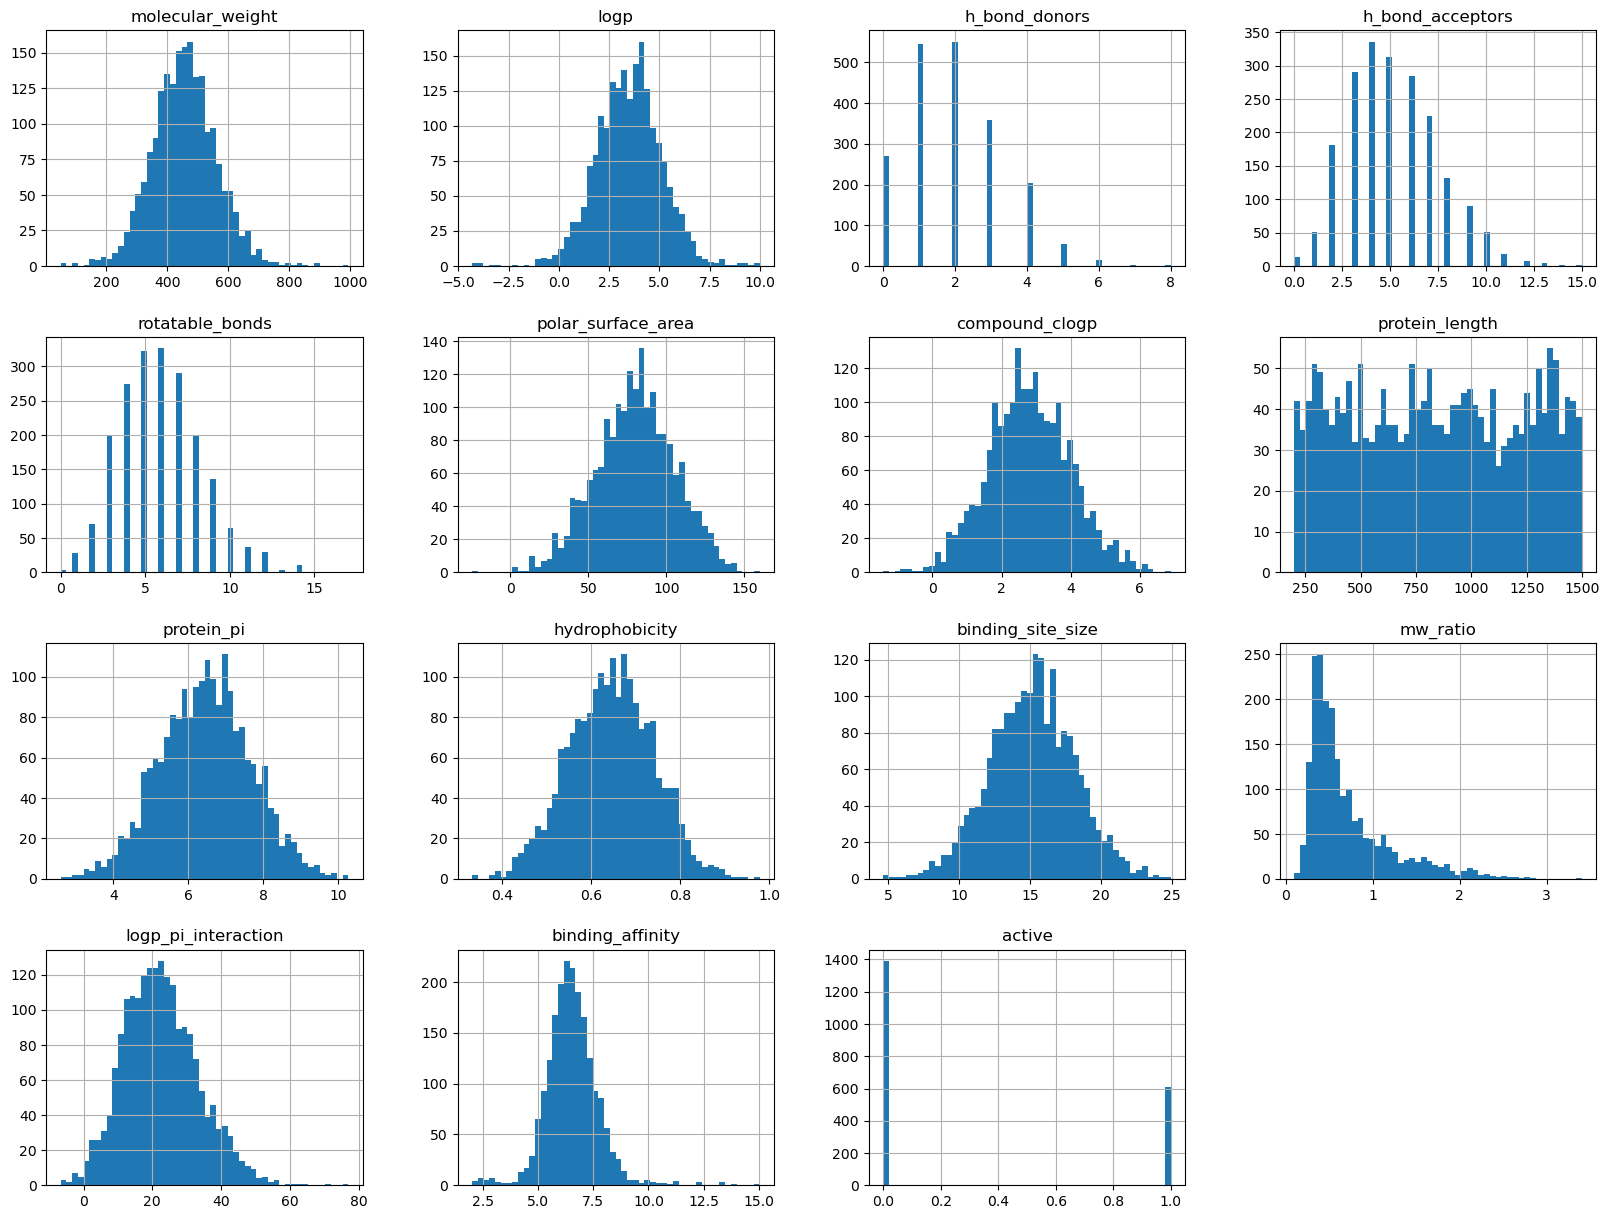

In [6]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

Рассмотрев гистограммы каждого признака, можно увидеть выбросы на некоторых признаках, отобразим их графики крупнее

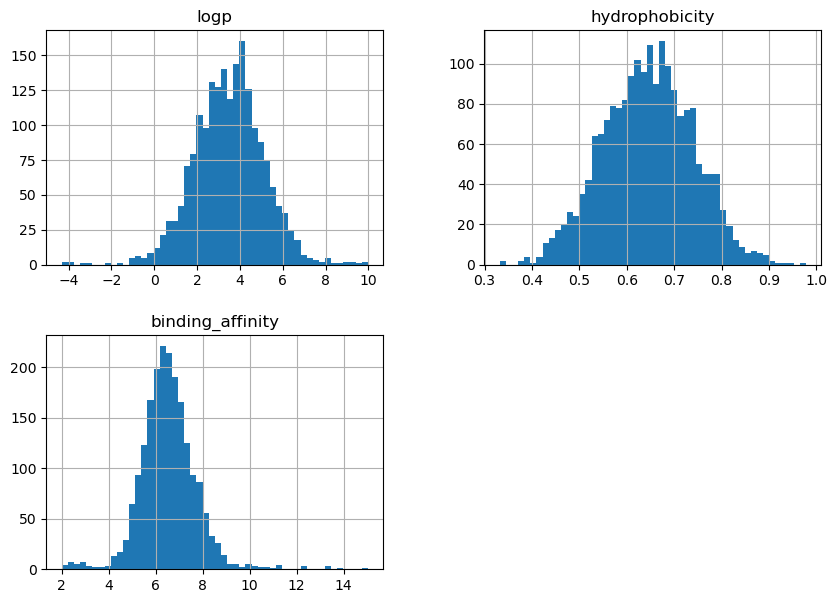

In [7]:
hist_feature = ["logp", "hydrophobicity", "binding_affinity"]
df[hist_feature].hist(bins=50, figsize=(10,7))
plt.show()

In [118]:
bad_feature = ["compound_id", "protein_id"]
drug = df.drop(bad_feature, axis=1)
drug.head(5)

,molecular_weight,logp,h_bond_donors,h_bond_acceptors,rotatable_bonds,polar_surface_area,compound_clogp,protein_length,protein_pi,hydrophobicity,binding_site_size,mw_ratio,logp_pi_interaction,binding_affinity,active
0,499.671415,2.487233,1,7,4,113.350817,4.050696,678,6.019657,0.812534,12.512165,0.736978,14.972288,5.996665,0
1,436.173570,3.283222,3,4,4,71.981132,3.704408,876,6.447408,0.651417,11.538420,0.497915,21.168271,6.445742,0
2,514.768854,NaN,2,11,11,83.936307,1.869610,658,3.925837,0.633467,13.155702,0.782323,9.074061,5.689583,0
3,602.302986,3.038058,0,5,5,79.868125,2.451909,312,7.597056,0.513038,12.071822,1.930458,23.080293,6.043438,0
4,426.584663,0.659578,2,4,5,88.198676,1.771936,1418,4.249454,0.613571,15.850448,0.300835,2.802846,4.845055,0


Борьба с выбросами в данных

In [119]:
def z_score(series):
    return np.abs((series - series.mean()) / series.std()) > 3

def IQR(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    iqr = Q3 - Q1
    lower_bound = Q1 - 1.5 * iqr
    upper_bound = Q3 + 1.5 * iqr
    return lower_bound, upper_bound, (series < lower_bound) | (series > upper_bound)

In [120]:
drugs_outliers = {}
for col in drug:
    series : pd.Series = drug[col]
    z_score_col = z_score(series)
    lower_bound, upper_bound, iqr_col = IQR(series)
    drugs_outliers[col] = {
        "Total objects": series.count(),
        "Z-score count" : series[z_score_col].count(),
        "IQR count": series[iqr_col].count(),
        "Z-score %": (series[z_score_col].count()/drug[col].count()) * 100,
        "IQR %": (series[iqr_col].count()/drug[col].count()) * 100,
    }


In [121]:
drugs_outliers = pd.DataFrame(drugs_outliers).T.sort_values(by="IQR %", ascending=False)
drugs_outliers

,Total objects,Z-score count,IQR count,Z-score %,IQR %
mw_ratio,2000.0,37.0,144.0,1.850000,7.200000
binding_affinity,2000.0,41.0,66.0,2.050000,3.300000
rotatable_bonds,2000.0,13.0,46.0,0.650000,2.300000
molecular_weight,2000.0,14.0,34.0,0.700000,1.700000
logp,1940.0,16.0,32.0,0.824742,1.649485
logp_pi_interaction,2000.0,8.0,17.0,0.400000,0.850000
compound_clogp,2000.0,5.0,15.0,0.250000,0.750000
binding_site_size,2000.0,6.0,14.0,0.300000,0.700000
protein_pi,2000.0,4.0,10.0,0.200000,0.500000
hydrophobicity,1940.0,5.0,9.0,0.257732,0.463918


Отобразим выбросы на графике

In [122]:
import seaborn as sns
def display_outliers(dataframe):
    for col in dataframe:
        series = dataframe[col].copy()
        z_score_col = z_score(series)
        lower_bound, upper_bound, iqr_col = IQR(series)
        sns.histplot(series, kde=True, bins=50)
        plt.axvline(lower_bound, linestyle='--', color='yellow', label='Bound lower-upper IQR')
        plt.axvline(upper_bound, linestyle='--', color='yellow')
        iqr_col = series[iqr_col]
        z_score_col = series[z_score_col]

        # Z-score выбросы
        plt.scatter(z_score_col, [-0.5]*len(z_score_col), color='blue', s=40, label='Z-score outlier')
        
        # IQR выбросы
        plt.scatter(iqr_col, [-0.5]*len(iqr_col), color='red', s=40, label='IQR outlier')
        plt.legend()
        
        plt.show()

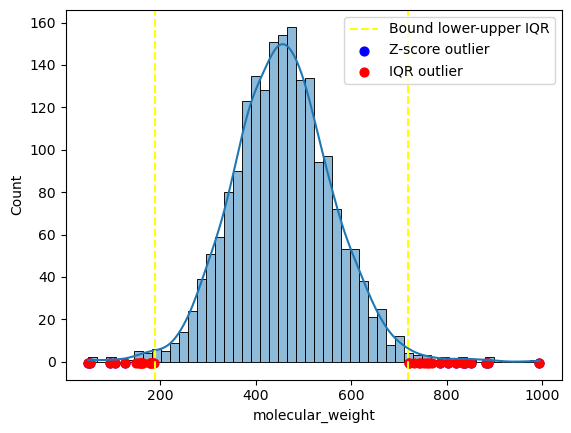

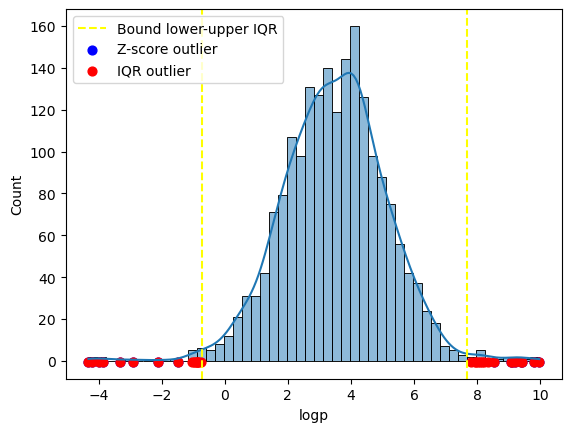

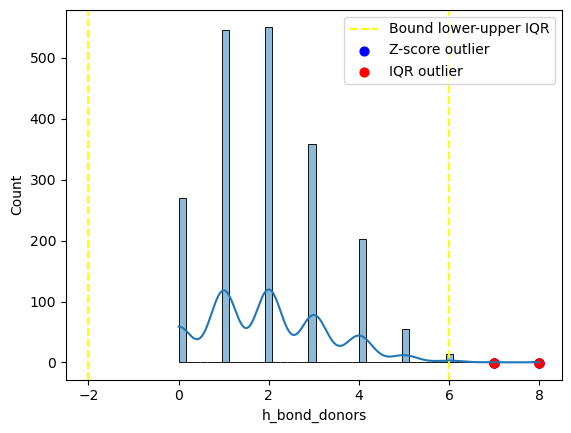

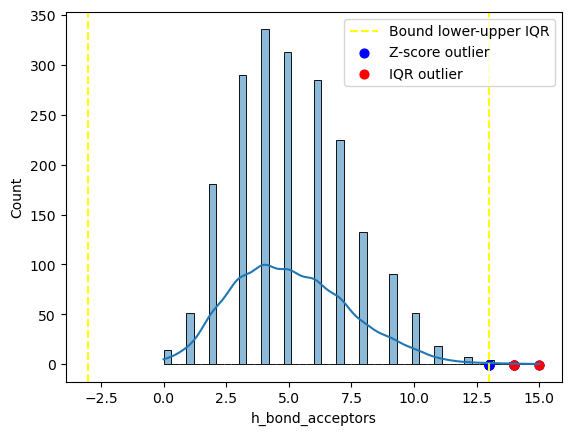

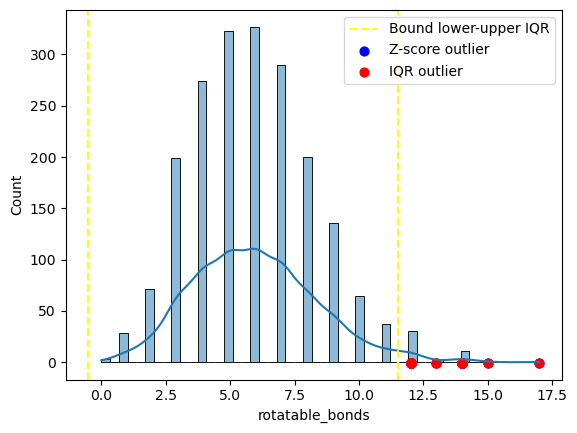

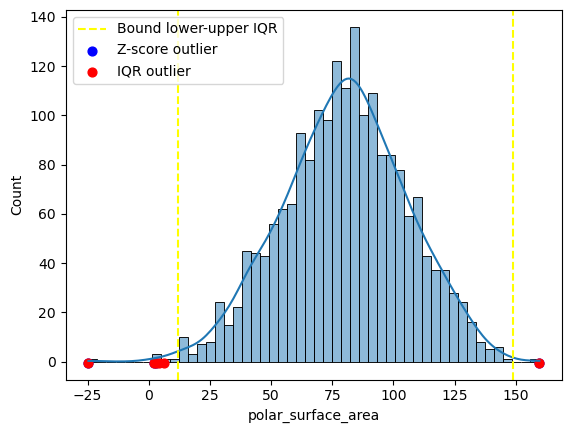

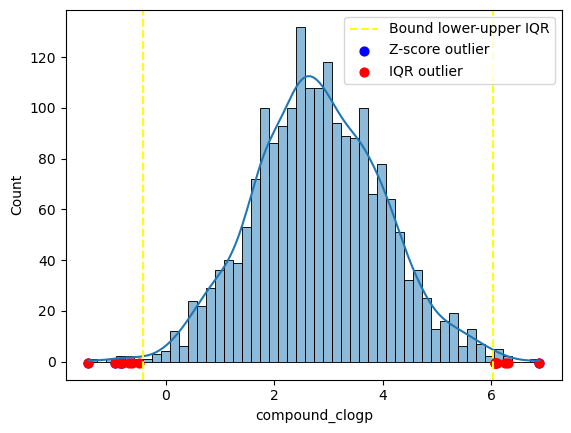

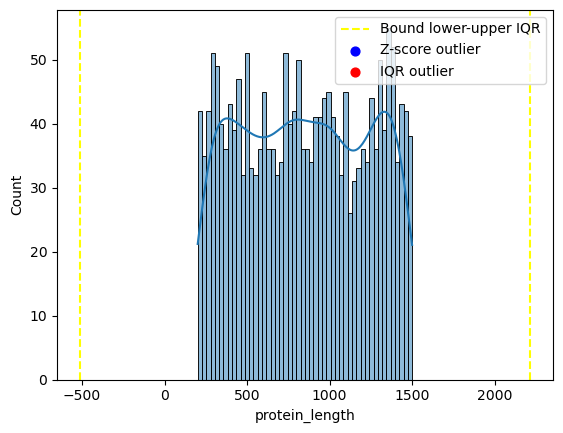

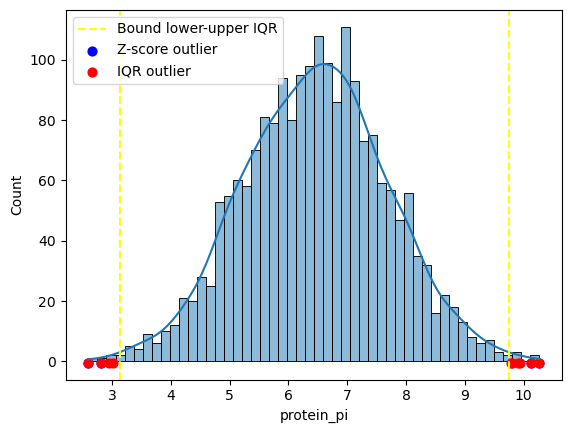

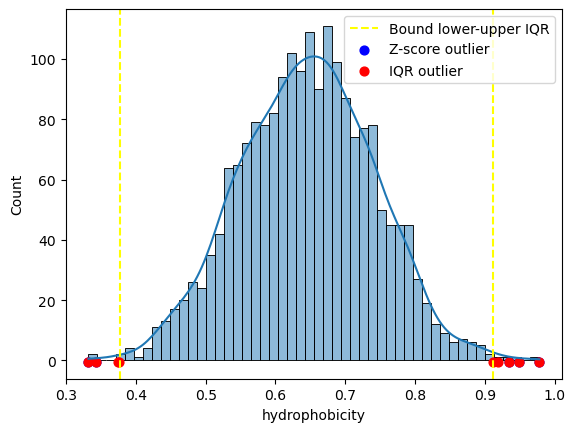

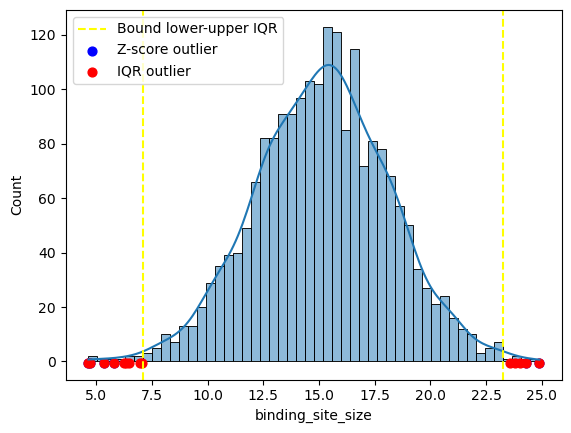

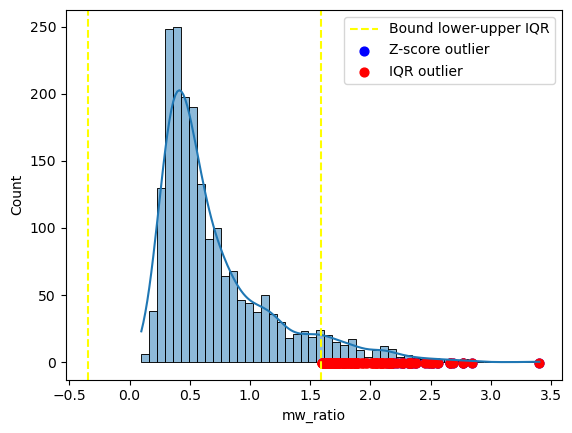

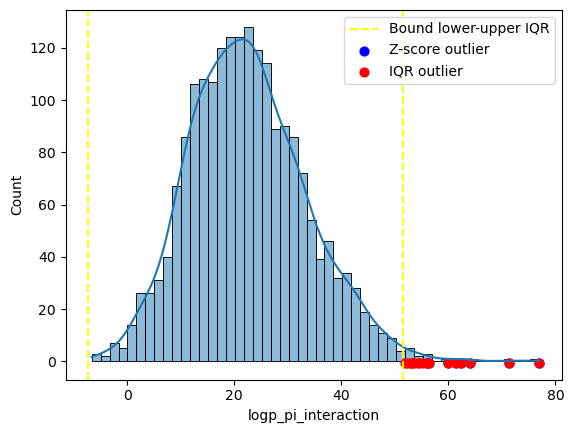

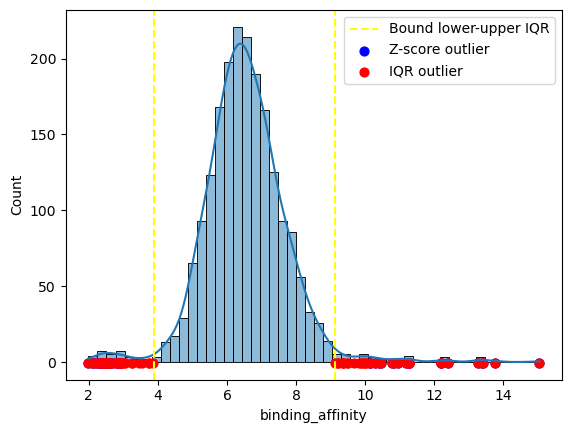

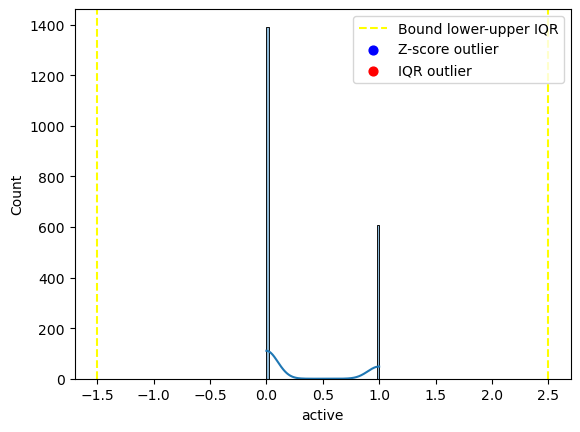

In [123]:
display_outliers(drug)

In [124]:
df[df.duplicated()] # просмотр дубликатов

,compound_id,protein_id,molecular_weight,logp,h_bond_donors,h_bond_acceptors,rotatable_bonds,polar_surface_area,compound_clogp,protein_length,protein_pi,hydrophobicity,binding_site_size,mw_ratio,logp_pi_interaction,binding_affinity,active


In [125]:
drug_without_outliers = drug.copy()
for col in drug_without_outliers:
    series = drug_without_outliers[col]
    lower_bound, upper_bound, _ = IQR(series)
    capped_series = series.clip(lower=lower_bound, upper=upper_bound)
    drug_without_outliers[col] = capped_series

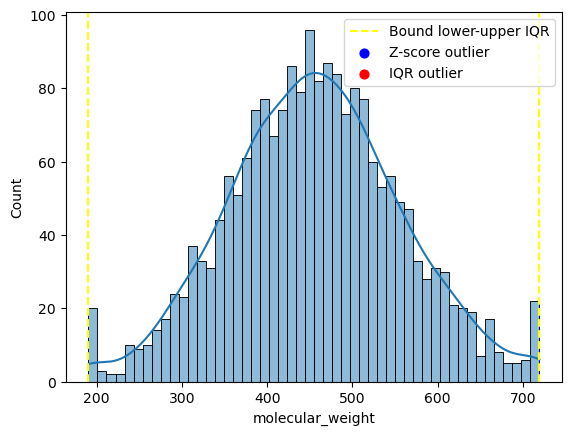

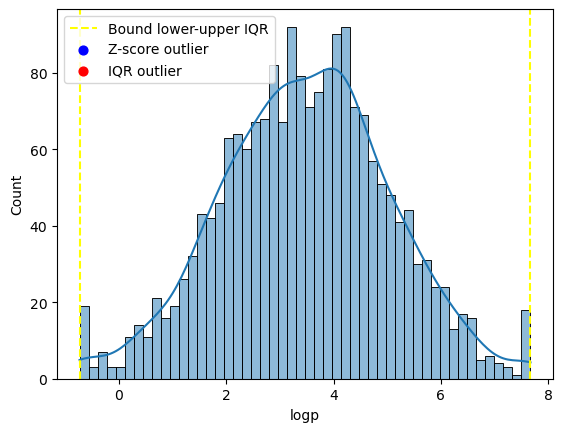

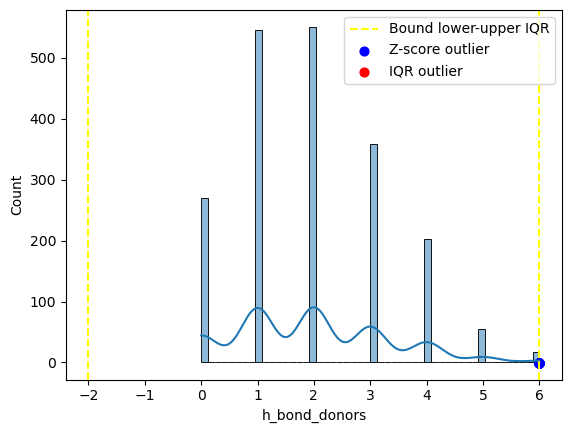

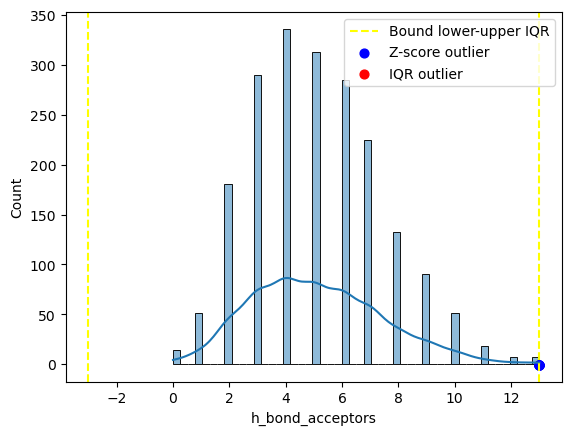

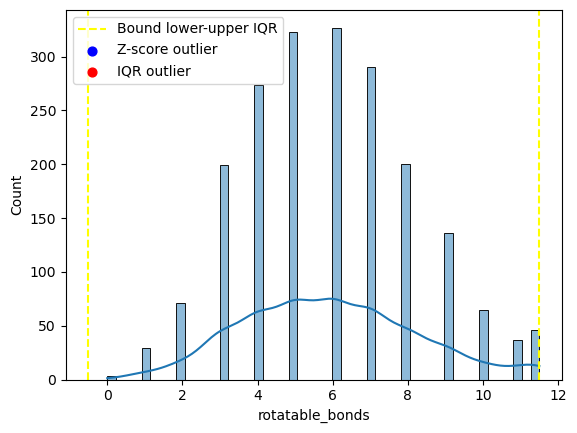

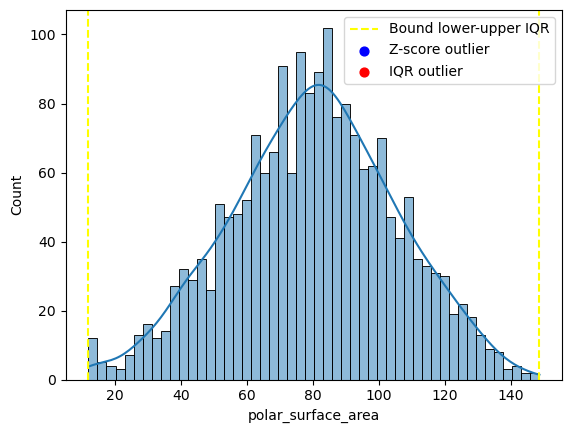

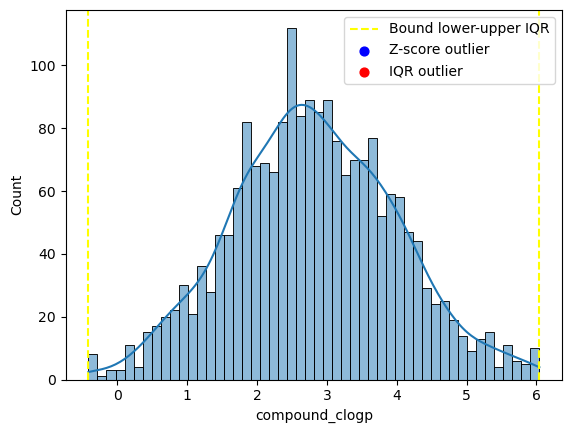

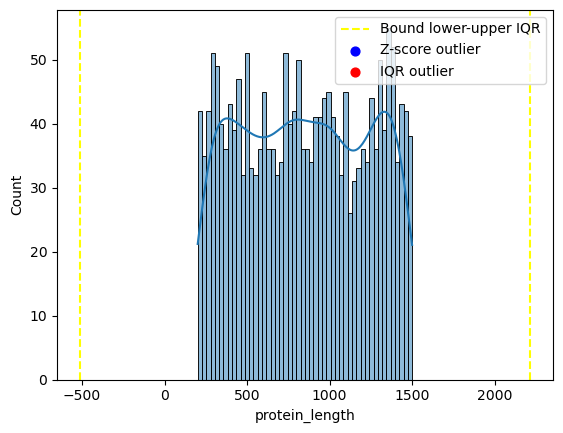

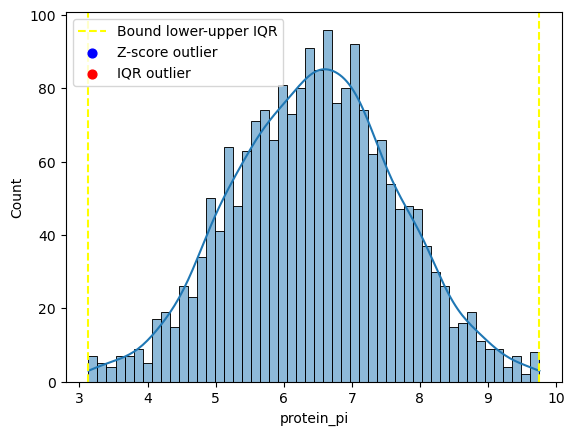

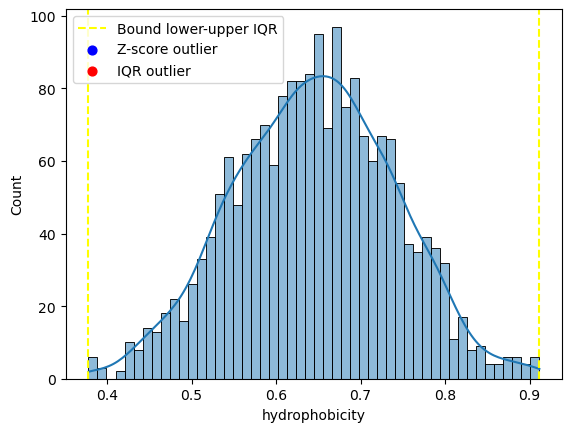

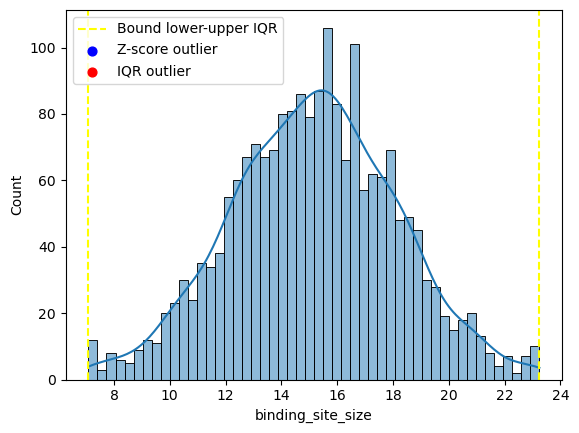

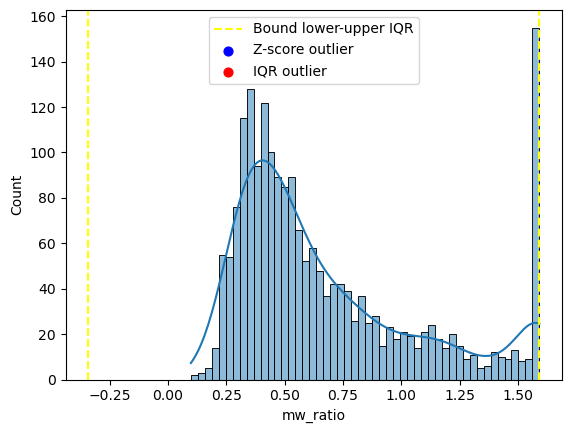

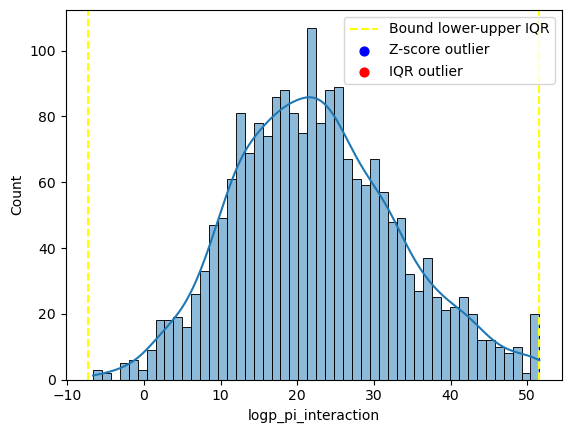

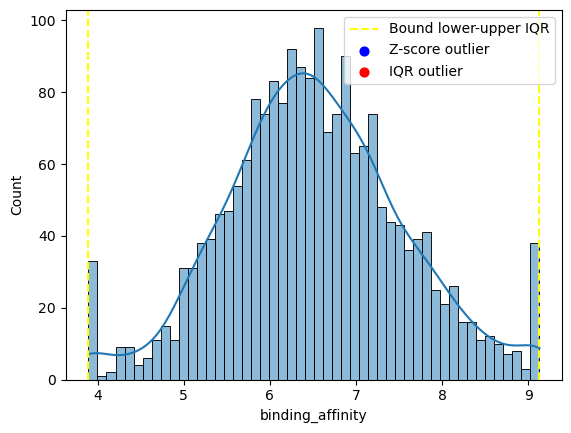

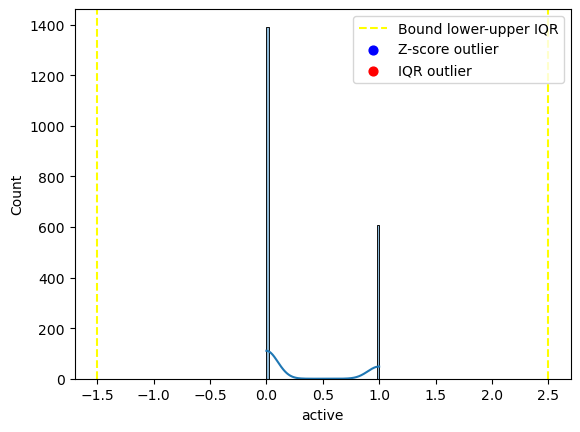

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   molecular_weight     2000 non-null   float64
 1   logp                 1940 non-null   float64
 2   h_bond_donors        2000 non-null   int64  
 3   h_bond_acceptors     2000 non-null   int64  
 4   rotatable_bonds      2000 non-null   float64
 5   polar_surface_area   1940 non-null   float64
 6   compound_clogp       2000 non-null   float64
 7   protein_length       2000 non-null   int64  
 8   protein_pi           2000 non-null   float64
 9   hydrophobicity       1940 non-null   float64
 10  binding_site_size    2000 non-null   float64
 11  mw_ratio             2000 non-null   float64
 12  logp_pi_interaction  2000 non-null   float64
 13  binding_affinity     2000 non-null   float64
 14  active               2000 non-null   int64  
dtypes: float64(11), int64(4)
memory usage:

In [126]:
display_outliers(drug_without_outliers)
drug_without_outliers.info()

Удаляем не нужные ID-ки и бинарный признак, который будет использовать в будущем. Так как мы строим регрессию, этот признак будет сильно коррелировать с нужным результатом.

Корреляция признаков по основному атрибуту 

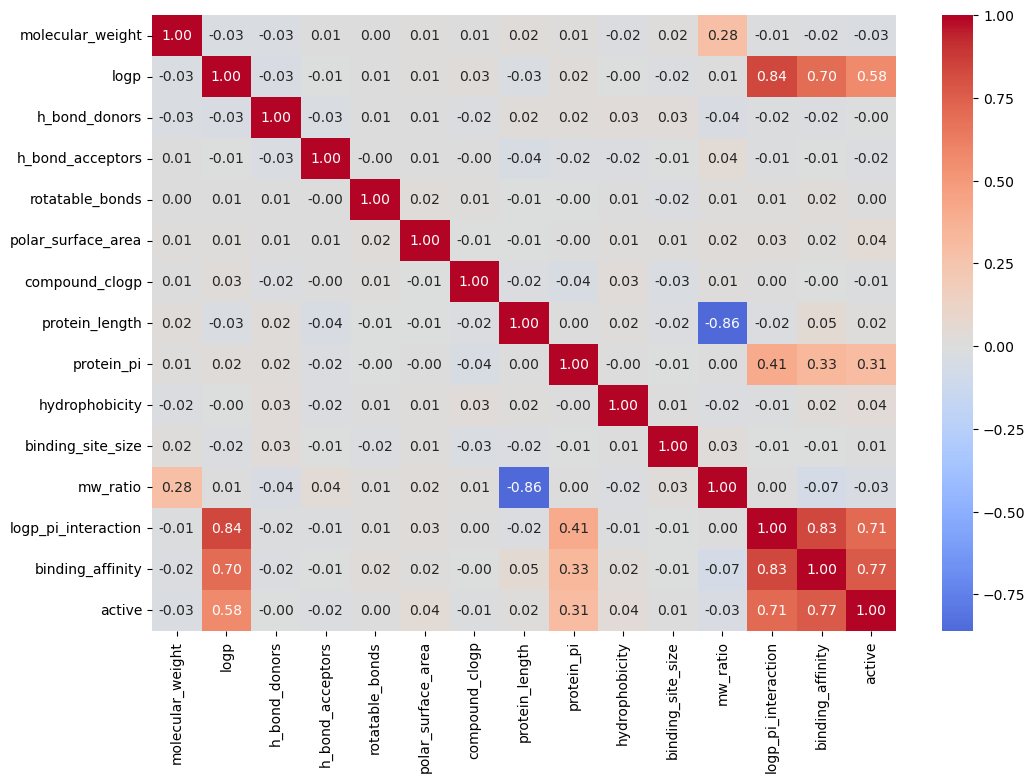

In [127]:
corr_matrix = drug_without_outliers.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.show()

In [128]:
drug_without_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   molecular_weight     2000 non-null   float64
 1   logp                 1940 non-null   float64
 2   h_bond_donors        2000 non-null   int64  
 3   h_bond_acceptors     2000 non-null   int64  
 4   rotatable_bonds      2000 non-null   float64
 5   polar_surface_area   1940 non-null   float64
 6   compound_clogp       2000 non-null   float64
 7   protein_length       2000 non-null   int64  
 8   protein_pi           2000 non-null   float64
 9   hydrophobicity       1940 non-null   float64
 10  binding_site_size    2000 non-null   float64
 11  mw_ratio             2000 non-null   float64
 12  logp_pi_interaction  2000 non-null   float64
 13  binding_affinity     2000 non-null   float64
 14  active               2000 non-null   int64  
dtypes: float64(11), int64(4)
memory usage:

Можем заметить что logp_pi_interaction, logp и protein_pi наиболее коррелируемые признаки. Однако у нас есть пропуски  в logp. Заполним их медианным значением.


Для примера заполним все пропуски медианным значением

In [129]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
drug_median = drug_without_outliers.copy()
imputer.fit(drug_median)
imputer.statistics_

array([4.54869085e+02, 3.50141622e+00, 2.00000000e+00, 5.00000000e+00,
       6.00000000e+00, 8.06066171e+01, 2.77358653e+00, 8.44000000e+02,
       6.47352715e+00, 6.47452021e-01, 1.52378349e+01, 5.32021386e-01,
       2.18589035e+01, 6.48030410e+00, 0.00000000e+00])

In [130]:
X = imputer.transform(drug_median)
drug_tr = pd.DataFrame(X, columns=drug_median.columns)
drug_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   molecular_weight     2000 non-null   float64
 1   logp                 2000 non-null   float64
 2   h_bond_donors        2000 non-null   float64
 3   h_bond_acceptors     2000 non-null   float64
 4   rotatable_bonds      2000 non-null   float64
 5   polar_surface_area   2000 non-null   float64
 6   compound_clogp       2000 non-null   float64
 7   protein_length       2000 non-null   float64
 8   protein_pi           2000 non-null   float64
 9   hydrophobicity       2000 non-null   float64
 10  binding_site_size    2000 non-null   float64
 11  mw_ratio             2000 non-null   float64
 12  logp_pi_interaction  2000 non-null   float64
 13  binding_affinity     2000 non-null   float64
 14  active               2000 non-null   float64
dtypes: float64(15)
memory usage: 234.5 KB


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   compound_id          2000 non-null   object 
 1   protein_id           2000 non-null   object 
 2   molecular_weight     2000 non-null   float64
 3   logp                 1940 non-null   float64
 4   h_bond_donors        2000 non-null   int64  
 5   h_bond_acceptors     2000 non-null   int64  
 6   rotatable_bonds      2000 non-null   int64  
 7   polar_surface_area   1940 non-null   float64
 8   compound_clogp       2000 non-null   float64
 9   protein_length       2000 non-null   int64  
 10  protein_pi           2000 non-null   float64
 11  hydrophobicity       1940 non-null   float64
 12  binding_site_size    2000 non-null   float64
 13  mw_ratio             2000 non-null   float64
 14  logp_pi_interaction  2000 non-null   float64
 15  binding_affinity     2000 non-null   f

Разделение данных

In [140]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(drug_without_outliers, random_state=42, test_size=0.2)
X_train = train_set.drop("active", axis=1).copy()
y_train = train_set['active'].copy()

X_test = test_set.drop("active", axis=1).copy()
y_test = test_set['active'].copy()

print(f"Обучающие данные: {len(train_set)}")
print(f"Тестовые данные: {len(test_set)}")

Обучающие данные: 1600
Тестовые данные: 400


Построение Пайплайна и преобразование данных

In [141]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

X_train_pre = pipeline.fit_transform(X_train)
X_test_pre = pipeline.transform(X_test) # стандартизируем тестовые данные

Обучение моделей

Линейная регрессия

In [142]:
from sklearn.linear_model import LogisticRegression
model_reg = LogisticRegression()
model_reg.fit(X_train_pre, y_train)

LogisticRegression()

In [144]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

def display_metrics(y, y_pred):
    print(f"Точность: {accuracy_score(y, y_pred)}")
    print(f"f1: {f1_score(y, y_pred)}")
    print(f"recall_score: {recall_score(y, y_pred)}")
    print(f"precision_score: {precision_score(y, y_pred)}")

Проверка обучения модели

In [145]:
pred_train = model_reg.predict(X_train_pre)
display_metrics(y_train, pred_train)

Точность: 0.991875
f1: 0.986272439281943
recall_score: 0.9831578947368421
precision_score: 0.989406779661017


In [146]:
pred_test = model_reg.predict(X_test_pre)
display_metrics(y_test, pred_test)

Точность: 0.98
f1: 0.9694656488549618
recall_score: 0.9548872180451128
precision_score: 0.9844961240310077


Рассмотрим более мощную модель (деревья принятия решений)

In [150]:
from sklearn.tree import DecisionTreeClassifier
model_tree = DecisionTreeClassifier(random_state=42)
model_tree.fit(X_train_pre, y_train)

DecisionTreeClassifier(random_state=42)

In [151]:
pred_train = model_tree.predict(X_train_pre)
display_metrics(y_train, pred_train)

Точность: 1.0
f1: 1.0
recall_score: 1.0
precision_score: 1.0


In [152]:
pred_test = model_tree.predict(X_test_pre)
display_metrics(y_test, pred_test)

Точность: 1.0
f1: 1.0
recall_score: 1.0
precision_score: 1.0


Ансамбли деревьев

In [153]:
from sklearn.ensemble import RandomForestClassifier
model_forest = RandomForestClassifier()
model_forest.fit(X_train_pre, y_train)

RandomForestClassifier()

In [154]:
pred_train = model_forest.predict(X_train_pre)
display_metrics(y_train, pred_train)

Точность: 1.0
f1: 1.0
recall_score: 1.0
precision_score: 1.0


In [155]:
pred_test = model_forest.predict(X_test_pre)
display_metrics(y_test, pred_test)

Точность: 1.0
f1: 1.0
recall_score: 1.0
precision_score: 1.0
